In [8]:
%matplotlib inline

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)

import pywt
sys.path.append("../wavelet_functions")
from dan_wavelets import dwt, idwt, modwt, imodwt

In [9]:
la8 = pd.read_csv("../datasets/la8.csv", index_col=0)
la8.rename(columns={
    la8.columns[1] : "h",
    la8.columns[2] : "g"
}, inplace=True)

In [10]:
signal = pd.read_csv("../datasets/ibm_returns.csv", header=None, index_col=0, names=["returns"]).squeeze()

In [11]:
signal = np.abs(signal)

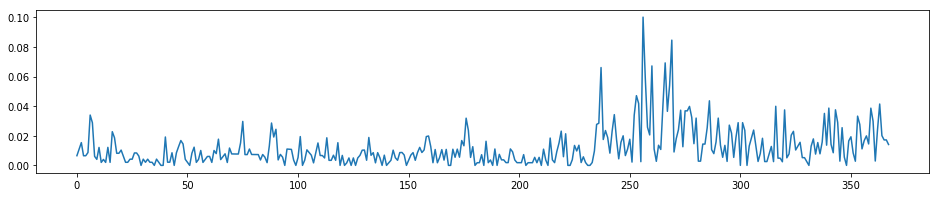

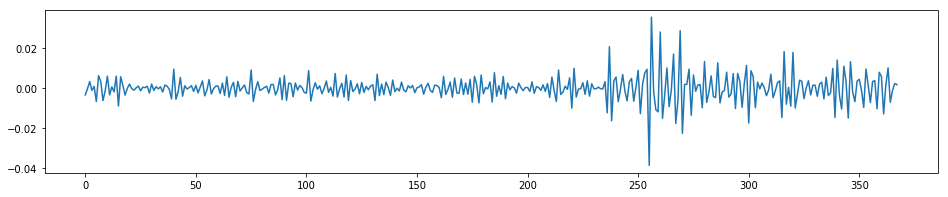

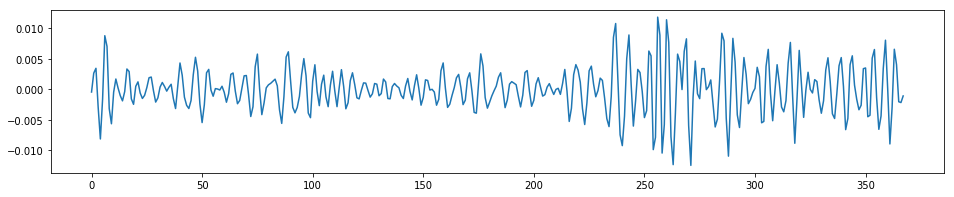

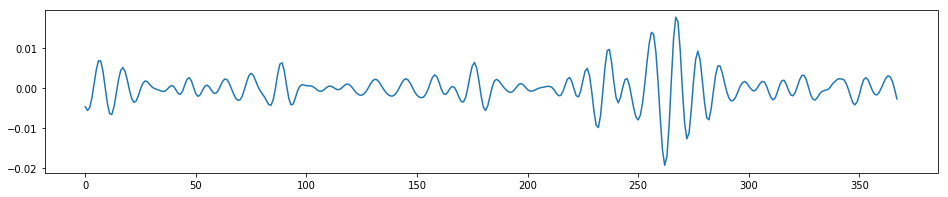

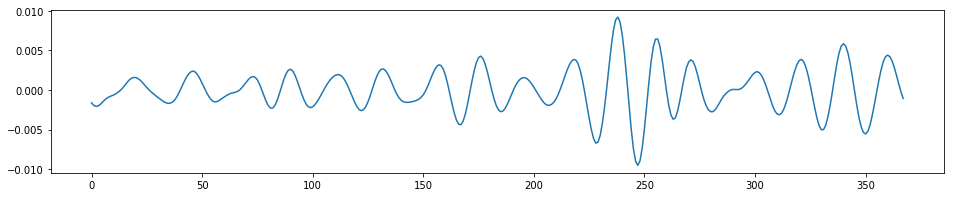

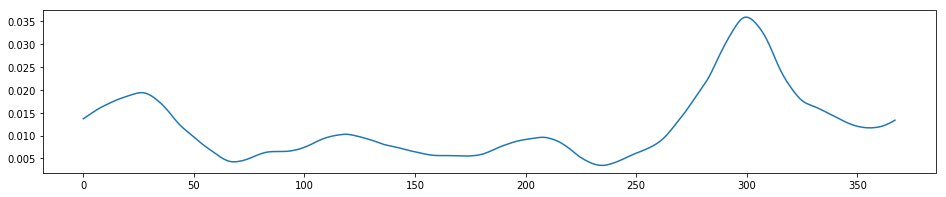

In [12]:
plt.plot(signal)
plt.show()
num_decompositions = 4
cA = signal
for i in range(num_decompositions):
    cD, cA = modwt(cA, j=i+1, filter_length=8, h=la8.h, g=la8.g)
    cD = imodwt(cD, [], j = i+1, filter_length=8, h=la8.h, g=la8.g)
    for j in range(i, 0, -1):
        cD = imodwt([], cD, j = j, filter_length=8, h=la8.h, g=la8.g)
    plt.plot(cD)
    plt.show()
for j in range(num_decompositions, 0, -1):
    cA = imodwt([], cA, j=j)
plt.plot(cA)
plt.show()